## Intro to Tensorflow Continued
----
This notebook represents coding challenges from week 3 of our [Intro to Tensorflow Coursera Course](https://www.coursera.org/learn/introduction-tensorflow/lecture/5bJjm/a-conversation-with-andrew-ng)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
from scipy import misc

### Convolutions and Pooling
---
Applying convolutional filtering to enhane features and then combining the values generated into smaller sample sizes to improve efficient analyses.  This is common among image compression algorithms.

We will focus on 2D Convolutions and MaxPooling2D

In [2]:
# Previous image recognition model -- NO CONVOLUTION OR POOLING
# This model processes each pixel in each image.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # Input layer (shape of incoming data)
    keras.layers.Dense(128, activation=tf.nn.relu),  # THis layer does the work
    keras.layers.Dense(10, activation=tf.nn.softmax)  # Output layer (shape of classification)
])
print(model.summary())

# Let's test this - basically our initial model fitting
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()
train_images = train_images/255
test_images = test_images/255
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4907 - acc: 0.8272
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3705 - acc: 0.8660
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3350 - acc: 0.8768
Epoch 4/5
60000/6000

In [13]:
# Let's try that with some handy pre-built convolution and pooling functions
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu',
                       input_shape=(28,28,1)),  # Performing a convolution
    keras.layers.MaxPooling2D(2, 2),  # Pooling and selecting our maximum value in a 2x2 grid
    keras.layers.Conv2D(64, (3, 3,), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),  # Input layer (shape of incoming data)
    keras.layers.Dense(128, activation=tf.nn.relu),  # THis layer does the work
    keras.layers.Dense(10, activation=tf.nn.softmax)  # Output layer (shape of classification)
])

# Now let's test the performance of our new convolutions and pooling
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total para

In [14]:
# Visualizing Convolutions
# Here we are going to examine what specific convolutions do for us
# We will look at a few images with the same label to see how different
# convolutions resolve different features
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


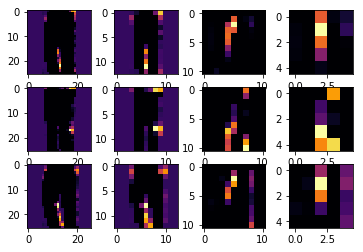

In [21]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [8]:
class FashionCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.95:
            print(f'Accuracy has reached {logs.get("acc")}. Stopping training')
            self.model.stop_training = True

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[FashionCallback()])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1890 - acc: 0.9467
Epoch 2/10
10000/10000 [==============================] - 0s 48us/sample - loss: 0.0571 - acc: 0.9802
0.9802


In [5]:
((tri, trl), (tei, tei)) = fmnist.load_data()

In [7]:
tri.shape

(60000, 28, 28)